In [63]:

import pandas as pd
import cleanup
import modules
import numpy as np


col_list= ["job_info_job_title", "pw_job_title_9089", "pw_job_title_908", "add_these_pw_job_title_9089"]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,71,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


add_these_pw_job_title_9089
42194/374362 11%
Filled: |█████---------------------------------------------| 11.3% Rows

job_info_job_title
239049/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows

pw_job_title_908
150379/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows

pw_job_title_9089
223591/374362 60%
Filled: |█████████████████████████████---------------------| 59.7% Rows



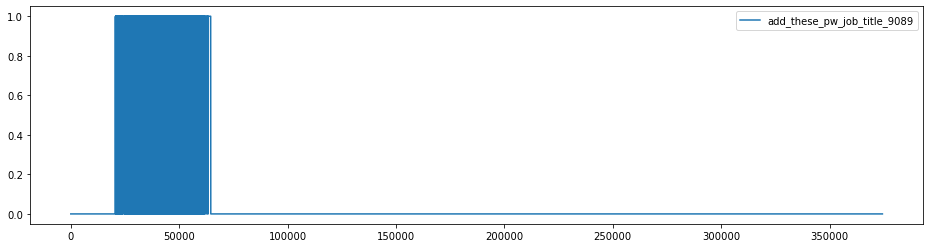

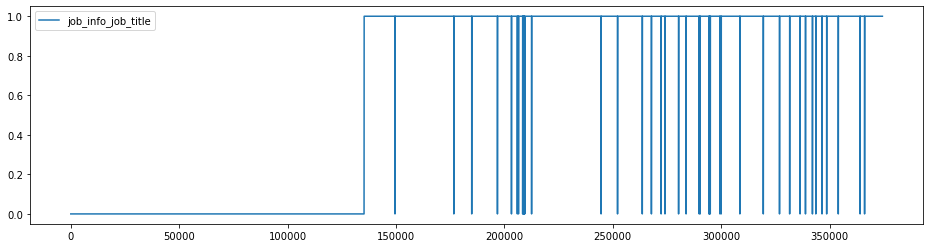

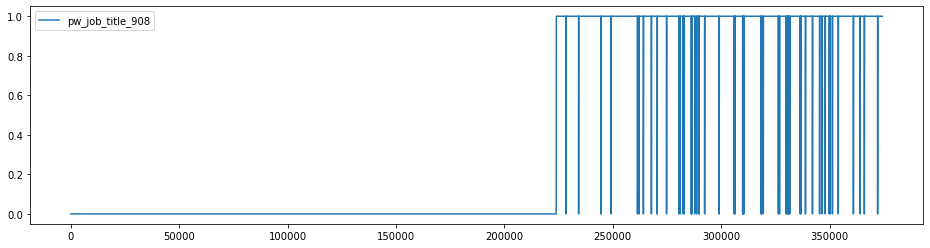

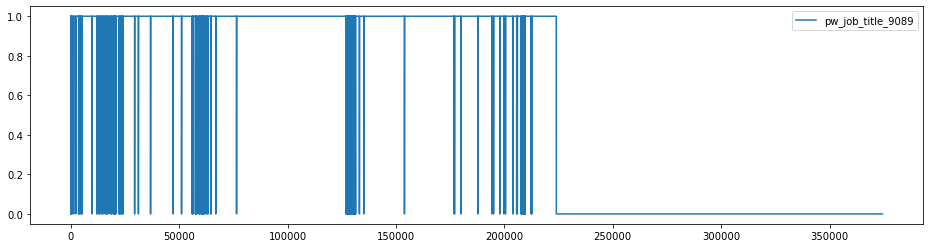

In [64]:
modules.print_count_of_values_relation(visas_df, True, True)

Die Spalten pw_job_title

In [65]:

visas_df["job_info_job_title"].value_counts()

Software Engineer                                 14827
Computer Systems Analyst - V                       4755
Senior Software Engineer                           3925
Computer Systems Analyst - II                      3434
Software Developer                                 3013
                                                  ...  
Senior Software Engineer - Org Detail or Other        1
Assistant Great Plains Accounting Manager             1
Senior Corporate Application Engineer                 1
Buyer, Wholesale                                      1
Sr. Manager, Revenue Management Development           1
Name: job_info_job_title, Length: 59495, dtype: int64

In [66]:
visas_df["pw_job_title_9089"].value_counts()

Software Developers, Applications            60002
Computer Systems Analysts                    20125
Software Developers, Systems Software        11057
Electronics Engineers, Except Computer        8296
Computer and Information Systems Managers     5307
                                             ...  
SAP APO ANALYST                                  1
IBM Curam Programmer/Developer                   1
International Purchasing Coordinator             1
SENIOR TELECOMMUNICATIONS ENGINEER               1
Computers Systems Engineers/Architects           1
Name: pw_job_title_9089, Length: 8307, dtype: int64

In [67]:
visas_df["pw_job_title_908"].value_counts()

Software Developers, Applications            42092
Computer Systems Analysts                     9631
Software Developers, Systems Software         9007
Electronics Engineers, Except Computer        4016
Computer and Information Systems Managers     3016
                                             ...  
Chief Revenue Officer                            1
Purchasing Agents, Exclu. Whsle & Retail         1
Rookie Coach                                     1
Computer Sustems Analysts                        1
HEAD COOK-MEXICAN FOOD                           1
Name: pw_job_title_908, Length: 8874, dtype: int64

In [68]:
visas_df["add_these_pw_job_title_9089"].value_counts()

Software Developers, Applications                10042
Computer Systems Analysts                         3040
Software Developers, Systems Software             1930
Electronics Engineers, Except Computer            1493
Computer Systems Analyst                           909
                                                 ...  
Application Engineer                                 1
Landscape, Architects                                1
Application Manager                                  1
Associate Professor, Modern Languages and Lit        1
OPERATION GEOLOGIST                                  1
Name: add_these_pw_job_title_9089, Length: 4276, dtype: int64

Die TOP Werte bei den Spalten pw_job_title_9089, pw_job_title_908 und add_these_pw_job_title_9089 stimmen if überein:
Die Spalten gehören anscheinend zusammen.

Während pw_job_title_908 und pw_job_title_9089 laut dem verteilungsgraphen überschneidungsfrei sind, ist dies bei add_these_pw_job_title_9089 nicht zwingend gegeben.

Es werden pw_job_title_908 und pw_job_title_9089 zusammengeführt. Anschließend wird der Blick auf add_these_pw_job_title_9089 gerichtet.

In [69]:
visas_df['pw_job_title_merged'] = visas_df['pw_job_title_9089'].fillna('') + visas_df['pw_job_title_908'].fillna('')

    #Cells which contain '', even after the merge, will get converted into NaN values. Providing better data for the subsequent analysis.
visas_df['pw_job_title_merged'].replace('', np.nan, inplace=True)

pw_job_title_merged
373970/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.9% Rows

add_these_pw_job_title_9089
42194/374362 11%
Filled: |█████---------------------------------------------| 11.3% Rows



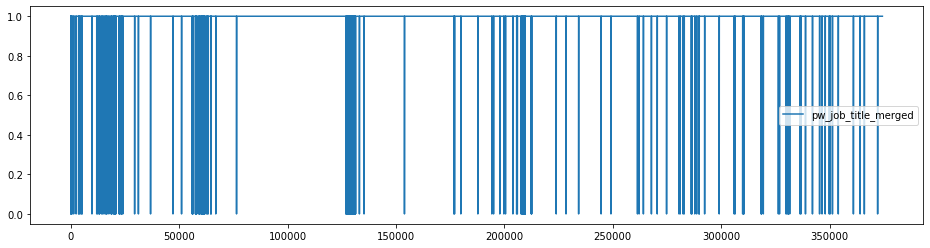

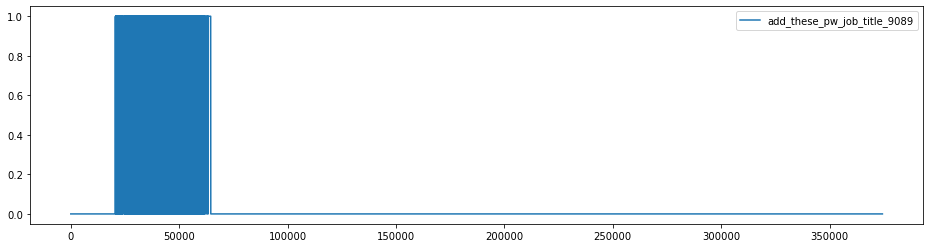

In [70]:

modules.print_count_of_values_relation(visas_df[["pw_job_title_merged", "add_these_pw_job_title_9089"]], True, True)

Alleine der Merge-Vorgang führt dazu, dass 99,9% aller Zeilen nun Werte enthalten. Es ist fraglich ob die Zusammenführung mit add_these_pw_job_title_9089 überhaupt noch notwendig ist.

Interessehalber schauen wir nach wie die Werte im Vergleich mit den bestehenden Werten aussehen.


In [71]:
visas_df[["pw_job_title_merged", "add_these_pw_job_title_9089"]].sample(50)

,pw_job_title_merged,add_these_pw_job_title_9089
215262,Mechanical Engineers,NaN
35168,"Software Developers, Applications","Software Developers, Applications"
247892,"COOK, RESTAURANT",NaN
104264,Network and Computer Systems Administrators*,NaN
312984,"Cooks, Restaurant",NaN
13141,Computer Systems Analyst,NaN
165911,"Internists, General",NaN
224456,"Software Developers, Applications",NaN
13025,Instructional Coordinators,NaN
20063,SENIOR COMPUTER PROGRAMMER,NaN


Die Werte unterscheiden sich oft nur geringfügig. Überschneidungen sind offensichtlich.



Wir versuchen nur NaN Werte mit den Werten von add_these_pw_job_title_9089 zu füllen.

In [72]:
tempdf = pd.DataFrame
tempdf = visas_df[['pw_job_title_merged','add_these_pw_job_title_9089']]

modules.print_full(tempdf[tempdf['pw_job_title_merged'].isna()])

tempdf = tempdf[tempdf['pw_job_title_merged'].isna()]
# tempdf.reset_index()
tempdf = tempdf.dropna(subset=['add_these_pw_job_title_9089'])

tempdf['add_these_pw_job_title_9089'].size

       pw_job_title_merged                        add_these_pw_job_title_9089
24                     NaN                                                NaN
41                     NaN                                                NaN
47                     NaN                                                NaN
56                     NaN                                                NaN
79                     NaN                                                NaN
94                     NaN                                                NaN
240                    NaN                                                NaN
249                    NaN                                                NaN
302                    NaN                                                NaN
326                    NaN                                                NaN
341                    NaN                                                NaN
611                    NaN                                      

45

In 45 cases it's possible to fill pw_job_title_merged with data from add_these_pw_job_title_9089. Eventough this isn't lots of data, we'll merge it for the sake of completeness.

In [73]:
visas_df['pw_job_title_merged'] = visas_df['pw_job_title_merged'].fillna(visas_df['add_these_pw_job_title_9089'])

pw_job_title_merged
374015/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.9% Rows



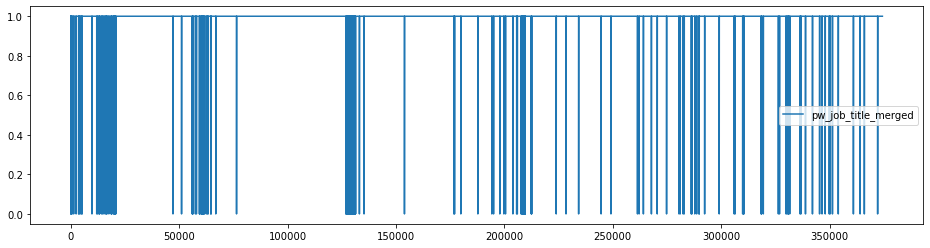

In [74]:
modules.print_count_of_values_relation(visas_df[["pw_job_title_merged"]], True, True)

Anzahl der einzigartigen Werte:

In [75]:

visas_df['pw_job_title_merged'].nunique()

14262

Anzahl der einzigartigen Werte, nachdem alle Werte auf lowercase abgeändert wurden.

In [76]:

visas_df['pw_job_title_merged'].str.lower().nunique()

12368

In [77]:
visas_df['pw_job_title_merged'].nunique()-visas_df['pw_job_title_merged'].str.lower().nunique()

1894

Es werden 1894 Duplikate vermieden.


In [78]:
visas_df['pw_job_title_merged'] = visas_df['pw_job_title_merged'].str.lower()

In [79]:

visas_df['pw_job_title_merged'].str.strip().nunique()

12368

Removing leading and ending spaces has no effect


In [80]:
visas_df['pw_job_title_merged'].replace(["NaN", 'NaT','nan','None', 'none', "-"], np.nan, inplace = True)

In [81]:
visas_df['pw_job_title_merged'].nunique()

12368

In [82]:

visas_df

,add_these_pw_job_title_9089,job_info_job_title,pw_job_title_908,pw_job_title_9089,pw_job_title_merged
0,NaN,NaN,NaN,"Computer Software Engineers, Applications","computer software engineers, applications"
1,NaN,NaN,NaN,ASBESTOS HANDLER,asbestos handler
2,NaN,NaN,NaN,Civil Engineer,civil engineer
3,NaN,NaN,NaN,File Clerk,file clerk
4,NaN,NaN,NaN,Sales & Service Engineer,sales & service engineer
...,...,...,...,...,...
374357,NaN,Office Assistant,"Office Clerks, General",NaN,"office clerks, general"
374358,NaN,Software Engineer II,"Software Developers, Applications",NaN,"software developers, applications"
374359,NaN,Computer Systems Analyst,Computer Systems Analyst,NaN,computer systems analyst
374360,NaN,Accounting Clerk,"Bookkeeping, Accounting, and Auditing Clerks",NaN,"bookkeeping, accounting, and auditing clerks"


In [83]:
modules.print_full(visas_df['pw_job_title_merged'].value_counts()[:30])

software developers, applications               105123
computer systems analysts                        30069
software developers, systems software            20233
electronics engineers, except computer           12350
computer and information systems managers         8456
computer systems analyst                          5323
accountants and auditors                          5233
computer software engineers, applications         4891
mechanical engineers                              4523
marketing managers                                3923
management analysts                               3731
financial analysts                                3642
database administrators                           3613
internists, general                               3608
electrical engineers                              3412
network and computer systems administrators       3350
statisticians                                     3127
software developer, applications                  2867
financial 

In [84]:

# visas_df['pw_job_title_merged'] = visas_df['pw_job_title_merged'].str.replace(r'\bs$', '', regex=True).str.strip()

In [85]:

visas_df['pw_job_title_merged'].nunique()

12368

In [91]:
def turn_plural_to_singular_string(x):
    """ If the value is a string, then remove delimiters
    otherwise, the value is numeric and can be converted.

    Additionally the provided data contains two '#############' values. These will get replaced by NaN.

    Source: https://pbpython.com/currency-cleanup.html (with slight changes)
    """
    if isinstance(x, str):
        if x[-1] == 's':
            x = x[0: len(x)-1]
    return(x)

#TODO: Fleißarbeit Splitte auf den ersten String vor dem Komma, schaue ob dieser ein s enthält. Z.B. software developers, application

In [92]:

visas_df["pw_job_title_merged"] = visas_df["pw_job_title_merged"].apply(turn_plural_to_singular_string)

computer software engineers, application
asbestos handler
civil engineer
file clerk


TypeError: can only concatenate list (not "str") to list

In [88]:

visas_df['pw_job_title_merged'].nunique()

11779

In [89]:

modules.print_full(visas_df['pw_job_title_merged'].value_counts()[:100])

software developers, application                                                 105314
computer systems analyst                                                          35392
software developers, systems software                                             20234
electronics engineers, except computer                                            12450
computer and information systems manager                                           8907
accountants and auditor                                                            5238
mechanical engineer                                                                5058
computer software engineers, application                                           4902
marketing manager                                                                  4192
management analyst                                                                 4120
database administrator                                                             4053
financial analyst               